### <strong>第一次作品：主成分分析實作</strong>
學號：711233112

姓名：留筠雅
<hr>

 <font color=skyblue>作品目標</font>：  
 
 主成分分析（PCA）在降維和提取資料中的核心資訊方面具有重要作用。透過完成本次實作，將理解到：
 1. 理解主成分分析（PCA）的基本概念和原理。
 2. 學會使用 Python 中的相應庫（如 scikit-learn）進行主成分分析。
 3. 掌握如何透過主成分分析降低資料的維度，並解釋降維後的資料解釋性。
 


<hr>

#### **第 1 題：**

#### **有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：**

(1) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

- 運用seaborn套件的指令可以幫助畫出相關係數圖

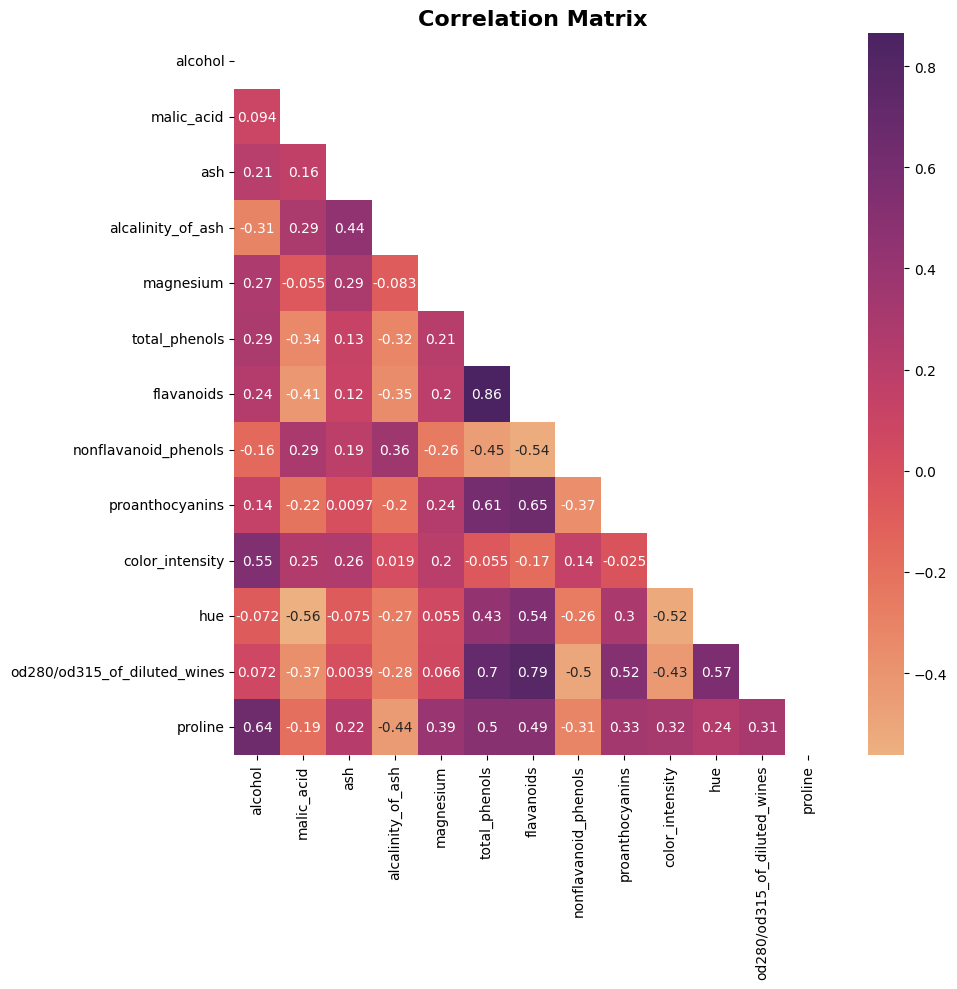

In [53]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the wine dataset
X, y = load_wine(return_X_y=True, as_frame=True)
labels = X.columns
# Plot the correlation matrix
plt.style.use('default')
plt.figure(figsize = (10, 10))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask

seaborn.heatmap(R, annot=True, mask = mask, cmap='flare')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
- 變數*flavanoids*, *total_phenols*, *od280/od315_of_diluted_wines* 呈現高度相關(相關係數$R\geq0.7$)。

(2) 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

- 盒鬚圖在資料分析中很重要，因為它能夠提供許多有價值的資訊，包括資料的集中趨勢、分佈的形狀以及可能的異常值。通過盒鬚圖，可以一目了然地看出資料的級距差異性，這些差異可能反映了資料中的重要特徵。
- sklearn 對資料做標準化是用到 <font color=lightgreen>StandardScaler()</font> 指令

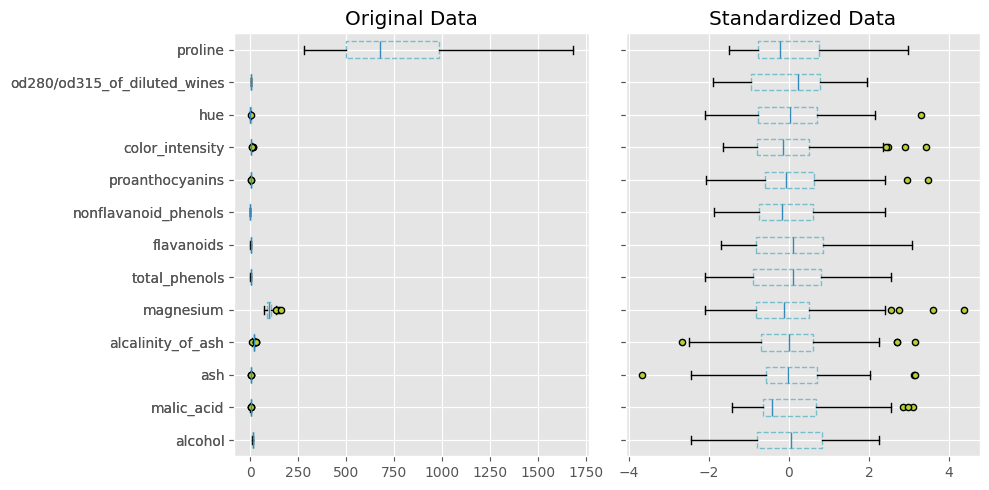

In [54]:
from sklearn.preprocessing import StandardScaler

ratings = np.array(X)
categories = X.columns
# Orignal Data Boxplot 
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey = True)
boxprops = dict(linestyle = '--', linewidth = 1, color = '#76becc')
flierprops = dict(marker='o', markerfacecolor = '#b2d235',
markersize = 4.5, linestyle = 'none')
ax[0].boxplot(ratings, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax[0].set_title('Original Data')

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Standardized Data Boxplot
ax[1].boxplot(X_std, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax[1].set_title('Standardized Data')

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從這組紅酒的資料來看，*proline* 的數字大小與變異與其他變數相差頗大，這對做主成分分析可能不利，因此有必要先將這些差距以標準化的方式拉近些，通過標準化，可以確保每個變數對主成分的貢獻是基於它們的變異性，而不是基於它們的尺度。


(3) 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

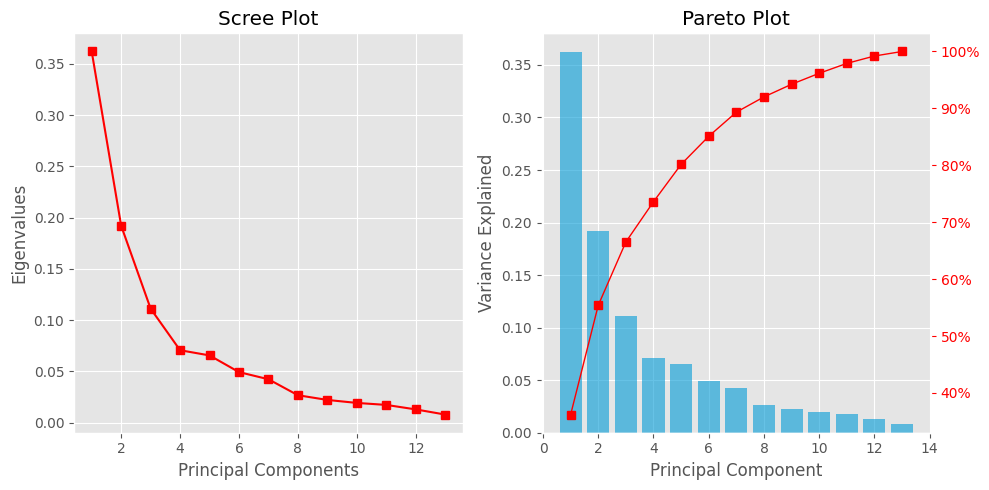

In [55]:
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Scree plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.arange(1, len(pca.explained_variance_ratio_)+1), 
           pca.explained_variance_ratio_, 
           marker = 's', 
           color = "red")

ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Eigenvalues')
ax[0].set_title('Scree Plot')
ax[0].grid(True)

# Pareto plot
x = np.arange(1, 1+len(pca.explained_variance_ratio_))
ax[1].bar( x,
           pca.explained_variance_ratio_, 
           color = '#009ad6', 
           alpha = 0.6, 
           align = 'center', 
           label = 'Variance Explained')

ax_twinx = ax[1].twinx()
ax_twinx.plot(x,
              pca.explained_variance_ratio_.cumsum()/pca.explained_variance_ratio_.sum()*100, 
              marker='s', lw=1, 
              color="red")

ax_twinx.tick_params(axis='y', colors='red')
ax_twinx.yaxis.set_major_formatter(PercentFormatter())

ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Variance Explained')
ax_twinx.grid()
ax[1].set_title('Pareto Plot')

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 當 Scree plot 中的曲線開始平緩時，表示添加更多的主成分對解釋變異量的增加不那麼顯著。在曲線開始平緩之後，額外的主成分可能只能解釋非常少的額外變異量，這意味著前幾個主成分已經涵蓋了大部分原始變數的變異量，在左圖裡第四個主成分後曲線開始趨於平緩，表示前四個主成分已經涵蓋大部分原變數的變異量。
- 觀察 Pareto plot 顯示，前四個主成分已經解釋了超過70% 的原始變數的變異量。這意味著僅使用這四個主成分就足以保留大部分重要的資訊，從而實現了資料的有效縮減目的。


(4) 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？

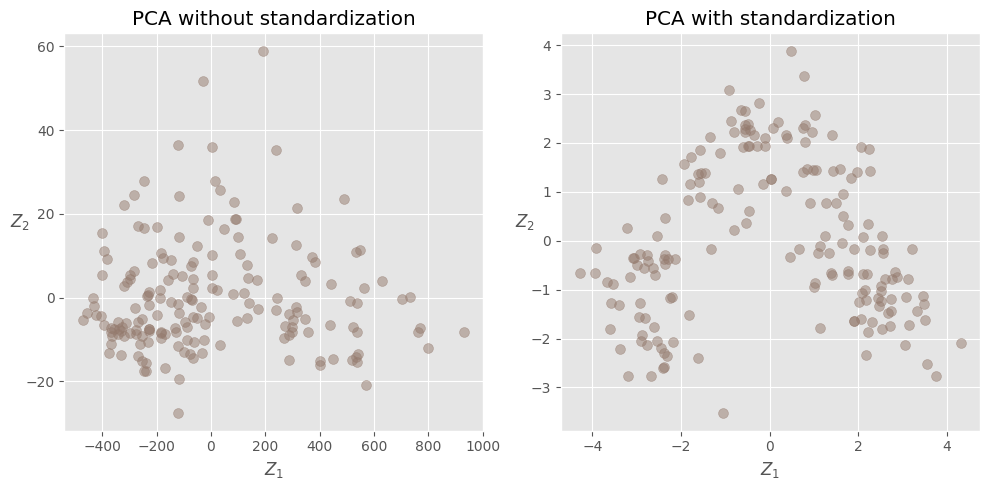

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_std = pca.fit_transform(X_std)

# Plot the first two principal components
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_pca[ :, 0], X_pca[ :, 1], color = "#947A6D", s=50, alpha=0.5)
ax[0].set_title('PCA without standardization')
ax[0].set_xlabel(r'$Z_1$')
ax[0].set_ylabel(r'$Z_2$', rotation = 0)

ax[1].scatter(X_pca_std[ :, 0], X_pca_std[ :, 1], color = "#947A6D", s=50, alpha=0.5)
ax[1].set_title('PCA with standardization')
ax[1].set_xlabel(r'$Z_1$')
ax[1].set_ylabel(r'$Z_2$', rotation = 0)

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 左圖是未經標準化的PCA散布圖，相較右圖經標準化後的PCA散布圖，不太容易看出其分群，尤其左圖的左半部份資料點較集中，頂多隱約看出分兩群。
- 標準化後的資料較看的出來分三群，分別是左下、中上與右下一群。


(5) 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

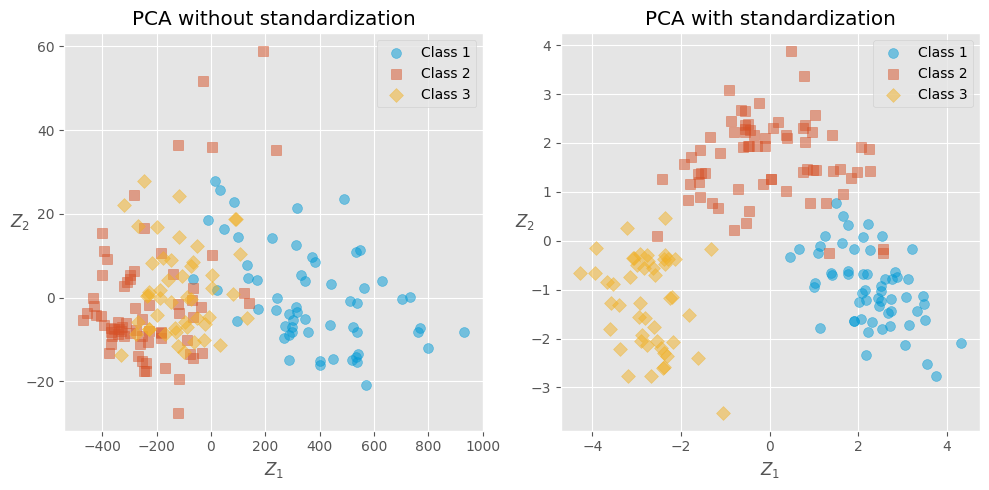

In [57]:
# Plot the first two principal components with class(y) labels
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# marker按照不同組別class有不同的形狀
markers = ['o', 's', 'D']
# color按照不同組別class有不同的顏色
colors = ['#009ad6', '#d65228', '#f1b125']

for i in range(3):
    ax[0].scatter(X_pca[y == i, 0], 
                  X_pca[y == i, 1], 
                  label = f'Class {i+1}', 
                  s = 50, 
                  alpha = 0.5, 
                  marker =markers[i], 
                  color = colors[i])
ax[0].set_title('PCA without standardization')
ax[0].set_xlabel(r'$Z_1$')
ax[0].set_ylabel(r'$Z_2$', rotation = 0)
ax[0].legend()

for i in range(3):
    ax[1].scatter(X_pca_std[y == i, 0], 
                  X_pca_std[y == i, 1], 
                  label = f'Class {i+1}', 
                  s = 50, alpha = 0.5, 
                  marker =markers[i], 
                  color = colors[i])
ax[1].set_title('PCA with standardization')
ax[1].set_xlabel(r'$Z_1$')
ax[1].set_ylabel(r'$Z_2$', rotation = 0)
ax[1].legend()

plt.tight_layout()
plt.show()



**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 加入組別後，左圖可看出，未經標準化會使class3夾在class1與class2之間。
- 經過標準化後，符合子題(4)的結果分成左中右三群。

(6) 如果採三個主成分，則可繪製立體圖。觀察立體圖是否比平面圖具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

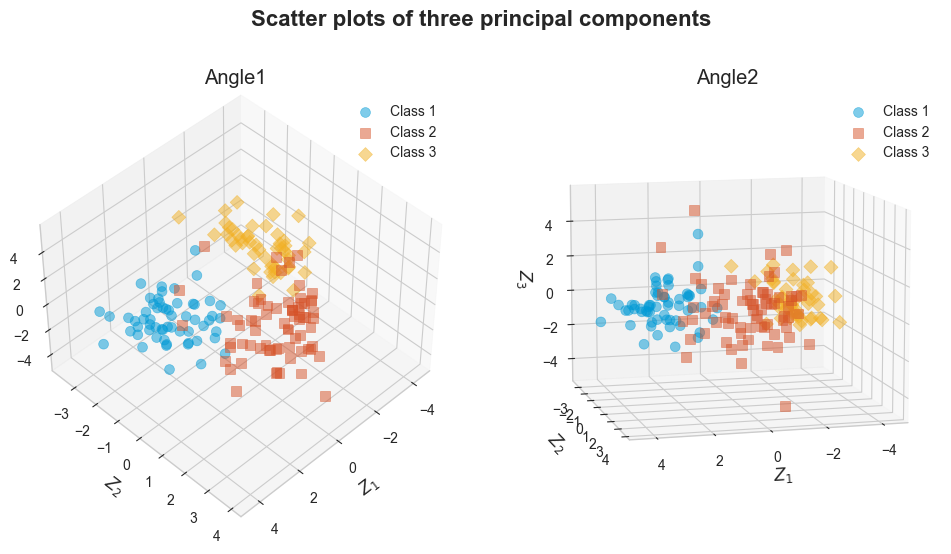

In [58]:
plt.style.use("seaborn-v0_8-whitegrid")
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_std)

# Plot the first third principal components with class(y) labels
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
# marker按照不同組別class有不同的形狀
markers = ['o', 's', 'D']
# color按照不同組別class有不同的顏色
colors = ['#009ad6', '#d65228', '#f1b125']

for i in range(3):
    ax.scatter( X_pca_3[y == i, 0],
                X_pca_3[y == i, 1], 
                X_pca_3[y == i, 2], 
                label = f'Class {i+1}', 
                s = 50, alpha = 0.5, 
                marker =markers[i], 
                color = colors[i] )
ax.set_title('Angle1')
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
ax.set_zlabel(r'$Z_3$')
ax.legend()
# 設定視角
ax.view_init(elev=45, azim=45)

ax2 = fig.add_subplot(122, projection='3d')
for i in range(3):
    ax2.scatter( X_pca_3[y == i, 0],
                 X_pca_3[y == i, 1], 
                 X_pca_3[y == i, 2], 
                 label = f'Class {i+1}', 
                 s = 50, alpha = 0.5, 
                 marker =markers[i], 
                 color = colors[i] )
ax2.set_title('Angle2')
ax2.set_xlabel(r'$Z_1$')
ax2.set_ylabel(r'$Z_2$')
ax2.set_zlabel(r'$Z_3$')
ax2.legend()
# 設定視角
ax2.view_init(elev=10, azim=75)

# 主標題
plt.suptitle("Scatter plots of three principal components", fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 加入第三個主成分後，class 2的離散程度較class1與class3大。

(7) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出觀察心得。

視覺化 $Z_1$ 與 $Z_2$ 的組成係數，顏色越突出代表其絕對值越大。

In [59]:
import pandas as pd
df = pd.DataFrame()  # Replace with the actual DataFrame
labels = X.columns
# Rest of the code
pcs = np.array(pca.components_) # (n_comp, n_features)
df_pc = pd.DataFrame(pcs, columns=labels)

df_pc.index = [f"第{c}主成分" for c in['一', '二']]
styled_df = df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None, )\
    .format("{:.2}")

styled_df.set_table_styles([{
    'selector': 'td',
    'props': [('text-align', 'center')]
}])



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
第一主成分,0.14,-0.25,-0.0021,-0.24,0.14,0.39,0.42,-0.3,0.31,-0.089,0.3,0.38,0.29
第二主成分,-0.48,-0.22,-0.32,0.011,-0.3,-0.065,0.0034,-0.029,-0.039,-0.53,0.28,0.16,-0.36


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從第一主成分我們可以看出 *flavanoids*, *total_phenols*, *od280/od315_of_diluted_wines* 造就了紅酒組別最大的數值差異。
- 與相關係數矩陣對照下，這三個變數剛好是相關係數最高的變數，相關係數矩陣本身就是個共變異數矩陣，我們知道PCA是對共變異數矩陣取出特徵向量，或許這是變數剛好是這三個的原因。
- 主成分本身的方向就解釋了原始數據中多個特徵之間的共變異傾向。

<hr>



#### **第 2 題：**  
#### **回答類似習題 1 的問題（如下所述），資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數共 30 個，樣本數為 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。**

(1) 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

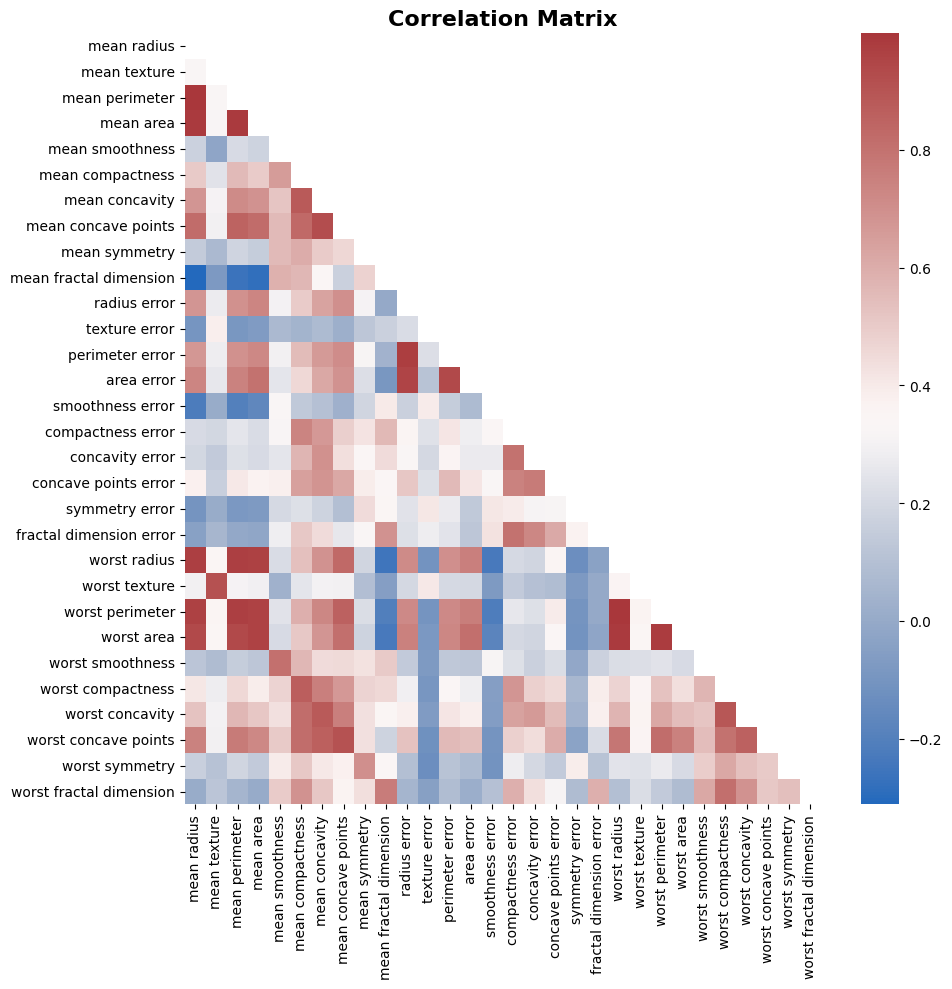

In [60]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
plt.style.use('default')

# Load the breast cancer dataset
X, y =load_breast_cancer(return_X_y=True, as_frame=True)
labels = X.columns

# Plot the correlation matrix
plt.figure(figsize = (10, 10))
R = X.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask

seaborn.heatmap(R, annot=False, mask = mask, cmap='vlag')
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


- 由於變數過多直接放相關係數圖會不太清楚變數間關係，比較感興趣的是高度相關的變數。
- 使用VIF值來檢查哪些變數具有高度相關。


           Features   VIF Factor
0             const  1868.188844
1       mean radius  3806.115296
3    mean perimeter  3786.400419
4         mean area   347.878657
21     worst radius   799.105946
23  worst perimeter   405.023336
24       worst area   337.221924


<Figure size 1000x1000 with 0 Axes>

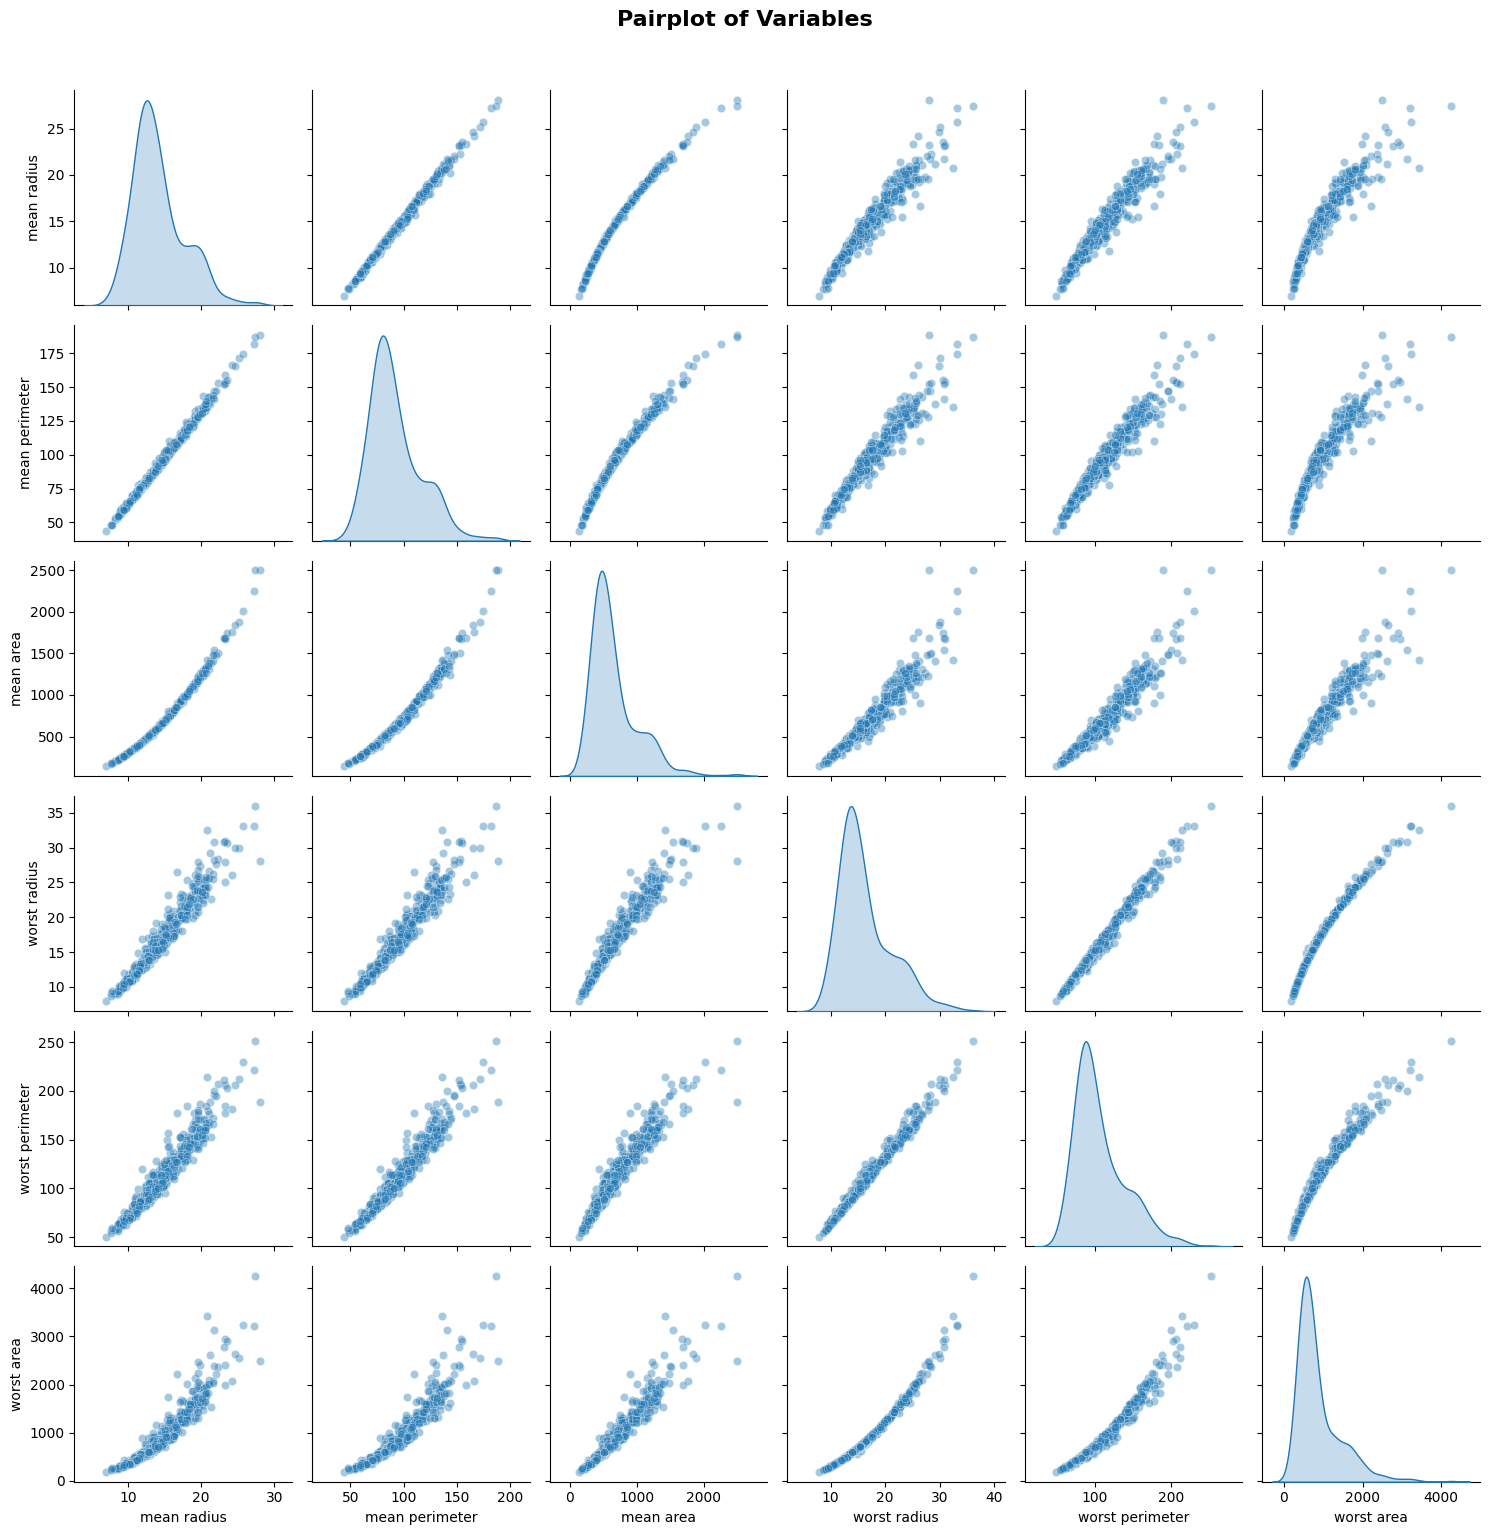

In [61]:
## 檢查有無多重共線性
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sns

X_vif = add_constant(X)
vif = pd.DataFrame()
vif["Features"] = X_vif.columns
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif[vif["VIF Factor"] > 100])

#選出VIF值大於100的特徵,除了constant
features = vif[vif["VIF Factor"] > 100].Features[1:]

# Pairplot with correlation coefficients
plt.figure(figsize=(10, 10))
sns.pairplot(data=X[features], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.4})
plt.suptitle('Pairplot of Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- VIF值高的變數大多都是面積、周長與半徑，這種幾何性質的類型彼此間有關連感覺很正常，半徑越大的腫瘤，周長越大。
- 從散布圖可以看出這些變數非常高度相關，尤其是 *mean perimeter* 與 *mean radius*。


(2) 繪製一張含每個量測變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

In [62]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

ratings = np.array(X)
categories = X.columns
# Orignal Data Boxplot 
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey = True)
# boxprops = dict(linestyle = '--', linewidth = 1, color = '#76becc')
flierprops = dict(facecolor = '#b2d235', linewidth=.5)

sns.boxenplot(data = X, ax = ax[0], orient='h', flier_kws=flierprops, palette='GnBu')
ax[0].set_title('Original Data')

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# 加入變數名
X_std = pd.DataFrame(X_std, columns=categories)

# Standardized Data Boxplot
sns.boxenplot(data = X_std, ax = ax[1], orient='h', flier_kws=flierprops, palette='GnBu')
ax[1].set_title('Standardized Data')

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 由於 *worst area* 數字大小與變異與其他變數相差頗大，因此需要標準化資料。


(3) 進行主成分分析，繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot。

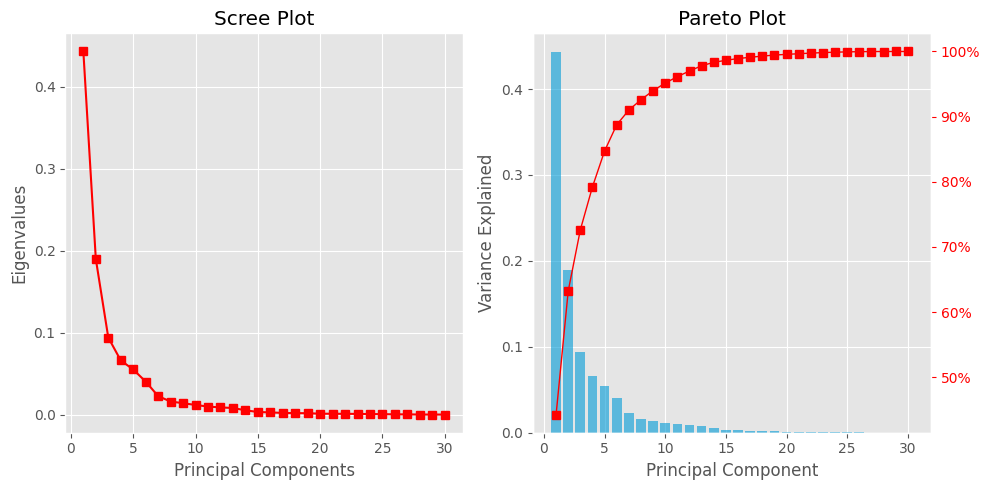

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Scree plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.arange(1, len(pca.explained_variance_ratio_)+1), 
           pca.explained_variance_ratio_, 
           marker = 's', 
           color = "red")

ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Eigenvalues')
ax[0].set_title('Scree Plot')
ax[0].grid(True)

# Pareto plot
x = np.arange(1, 1+len(pca.explained_variance_ratio_))
ax[1].bar( x,
           pca.explained_variance_ratio_, 
           color = '#009ad6', 
           alpha = 0.6, 
           align = 'center', 
           label = 'Variance Explained')

ax_twinx = ax[1].twinx()
ax_twinx.plot(x,
              pca.explained_variance_ratio_.cumsum()/pca.explained_variance_ratio_.sum()*100, 
              marker='s', lw=1, 
              color="red")

ax_twinx.tick_params(axis='y', colors='red')
ax_twinx.yaxis.set_major_formatter(PercentFormatter())

ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Variance Explained')
ax_twinx.grid()
ax[1].set_title('Pareto Plot')

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 在左圖裡第三個主成分後曲線開始趨於平緩，表示前三個主成分已經涵蓋大部分原變數的變異量。
- 觀察 Pareto plot 顯示，前三個主成分已經解釋了超過70% 的原始變數的變異量。這意味著僅使用這三個主成分就足以保留大部分重要的資訊，從而實現了資料的有效縮減目的。


(4) 每筆資料都有標籤值（label），代表腫瘤的成分（Malignant（惡性腫瘤）或 Benign（良性腫瘤））。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？

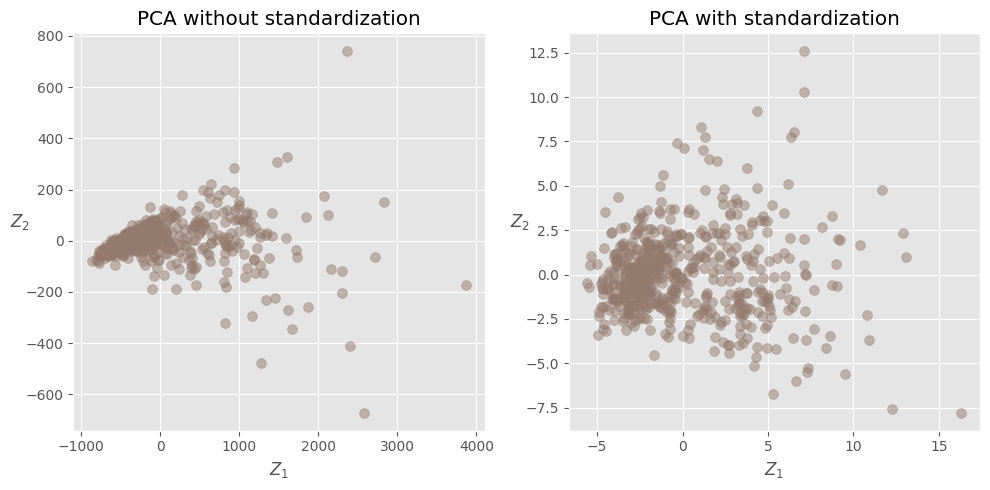

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_std = pca.fit_transform(X_std)

# Plot the first two principal components
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_pca[ :, 0], X_pca[ :, 1], color = "#947A6D", s=50, alpha=0.5)
ax[0].set_title('PCA without standardization')
ax[0].set_xlabel(r'$Z_1$')
ax[0].set_ylabel(r'$Z_2$', rotation = 0)

ax[1].scatter(X_pca_std[ :, 0], X_pca_std[ :, 1], color = "#947A6D", s=50, alpha=0.5)
ax[1].set_title('PCA with standardization')
ax[1].set_xlabel(r'$Z_1$')
ax[1].set_ylabel(r'$Z_2$', rotation = 0)

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 有無做標準化的差別在資料離散程度。
- 資料點分布感覺對稱 $Z_2= 0$ 。
- 單看主成分圖不太容易看出組別。

(5) 再依據每筆資料的標籤，在散佈圖上塗上不同顏色。

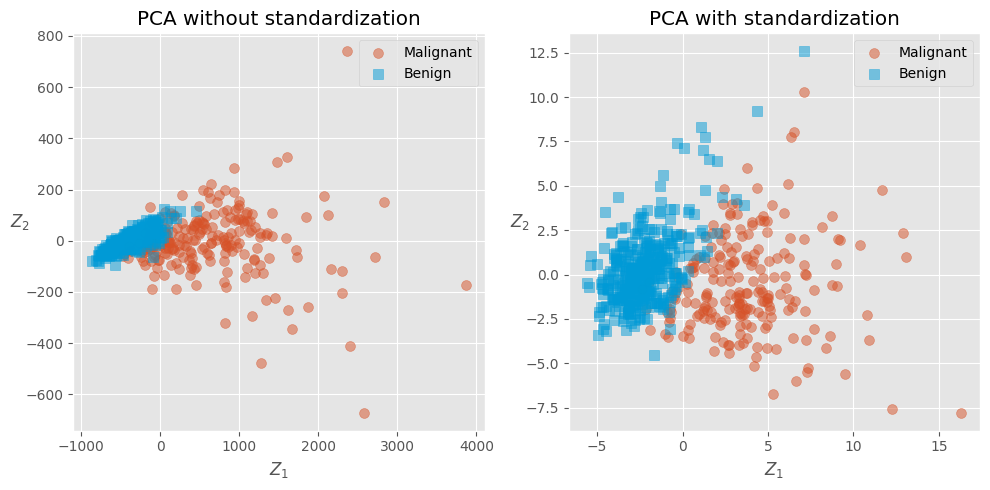

In [ ]:
# Plot the first two principal components with y labels
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# marker按照不同組別有不同的形狀
markers = ['o', 's']
# color按照不同組別有不同的顏色
colors = ['#d65228','#009ad6']

labels = ['Malignant', 'Benign']


for i in range(2):
    ax[0].scatter(X_pca[y == i, 0], 
                  X_pca[y == i, 1], 
                  label = labels[i], 
                  s = 50, 
                  alpha = 0.5, 
                  marker =markers[i], 
                  color = colors[i])
ax[0].set_title('PCA without standardization')
ax[0].set_xlabel(r'$Z_1$')
ax[0].set_ylabel(r'$Z_2$', rotation = 0)
ax[0].legend()

for i in range(2):
    ax[1].scatter(X_pca_std[y == i, 0], 
                  X_pca_std[y == i, 1], 
                  label = labels[i], 
                  s = 50, alpha = 0.5, 
                  marker =markers[i], 
                  color = colors[i])
ax[1].set_title('PCA with standardization')
ax[1].set_xlabel(r'$Z_1$')
ax[1].set_ylabel(r'$Z_2$', rotation = 0)
ax[1].legend()

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 加入標籤後，可以看出 Malignant 會分布在 $Z_1\gt 0$ 以及 Benign 會分布在 $Z_1\lt 0$ 的位置。

(6) 如果採三個主成分，則可繪製立體圖。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

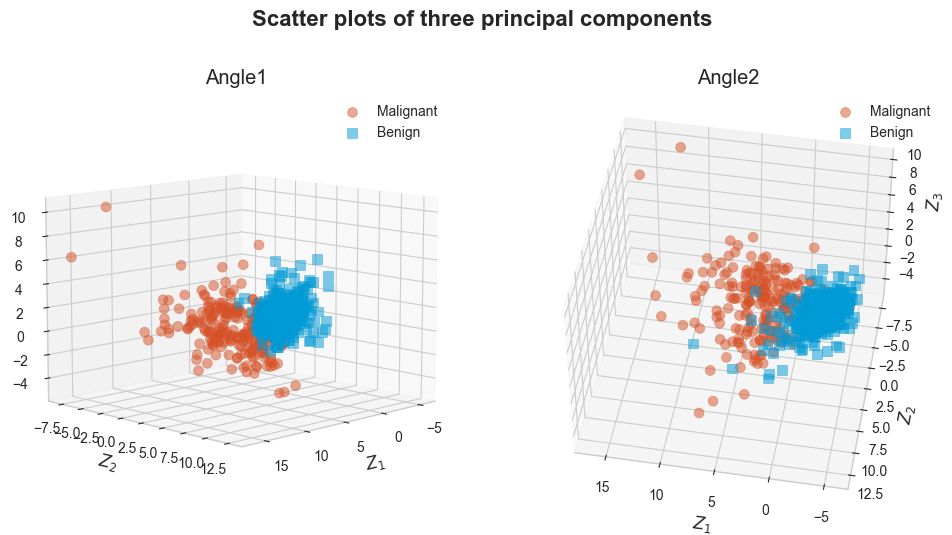

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_std)

# Plot the first third principal components with y labels
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
# marker按照不同組別有不同的形狀
markers = ['o', 's']
# color按照不同組別有不同的顏色
colors = ['#d65228','#009ad6']

labels = ['Malignant', 'Benign']

for i in range(2):
    ax.scatter( X_pca_3[y == i, 0],
                X_pca_3[y == i, 1], 
                X_pca_3[y == i, 2], 
                label = labels[i], 
                s = 50, alpha = 0.5, 
                marker =markers[i], 
                color = colors[i] )
ax.set_title('Angle1')
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
ax.set_zlabel(r'$Z_3$')
ax.legend()
# 設定視角
ax.view_init(elev=10, azim=45)

ax2 = fig.add_subplot(122, projection='3d')
for i in range(2):
    ax2.scatter( X_pca_3[y == i, 0],
                 X_pca_3[y == i, 1], 
                 X_pca_3[y == i, 2], 
                 label = labels[i], 
                 s = 50, alpha = 0.5, 
                 marker =markers[i], 
                 color = colors[i] )
ax2.set_title('Angle2')
ax2.set_xlabel(r'$Z_1$')
ax2.set_ylabel(r'$Z_2$')
ax2.set_zlabel(r'$Z_3$')
ax2.legend()
# 設定視角
ax2.view_init(elev=45, azim=100)

# 主標題
plt.suptitle("Scatter plots of three principal components", fontsize=16, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 考慮了第三個主成分後發現，*Benign* 較 *Malignant* 集中可以推測惡性腫瘤較正常腫瘤較多變化。

(7) $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。先不管理論怎麼說，就只是談談你的觀察與猜測。

In [ ]:
import pandas as pd

df = pd.DataFrame()  # Replace with the actual DataFrame
labels = X.columns
# Rest of the code
pcs = np.array(pca.components_) # (n_comp, n_features)
df_pc = pd.DataFrame(pcs, columns=labels)

df_pc.index = [f"第{c}主成分" for c in['一', '二']]
styled_df = df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None, )\
    .format("{:.2}")

styled_df.set_table_styles([{
    'selector': 'td',
    'props': [('text-align', 'center')]
}])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
第一主成分,0.22,0.1,0.23,0.22,0.14,0.24,0.26,0.26,0.14,0.064,0.21,0.017,0.21,0.2,0.015,0.17,0.15,0.18,0.042,0.1,0.23,0.1,0.24,0.22,0.13,0.21,0.23,0.25,0.12,0.13
第二主成分,-0.23,-0.06,-0.22,-0.23,0.19,0.15,0.06,-0.035,0.19,0.37,-0.11,0.09,-0.089,-0.15,0.2,0.23,0.2,0.13,0.18,0.28,-0.22,-0.045,-0.2,-0.22,0.17,0.14,0.098,-0.0083,0.14,0.28


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從第一主成分我們可以看出 *mean concavity*, *mean concave points* 造就了腫瘤組別最大的數值差異。
- 從第二主成分我們可以看出 *mean fractal dimension*, *fractal dimension error*, *worst fractal dimension* 造就了腫瘤組別最大的數值差異。